In [2]:
import pandas as pd
df=pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns',100)
df=df.drop(columns='veil-type')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l


# Data Cleaning

In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
cols=df.columns
print(cols)
print(len(cols))

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')
22


In [6]:
# group of df
col_list=[]
cols=df.columns
print(cols)
for x in cols:
    x=df[x].groupby(df[x]).first()
    x=[x]
    col_list.append(x)
    
print(col_list)    

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')
[[class
e    e
p    p
Name: class, dtype: object], [cap-shape
b    b
c    c
f    f
k    k
s    s
x    x
Name: cap-shape, dtype: object], [cap-surface
f    f
g    g
s    s
y    y
Name: cap-surface, dtype: object], [cap-color
b    b
c    c
e    e
g    g
n    n
p    p
r    r
u    u
w    w
y    y
Name: cap-color, dtype: object], [bruises
f    f
t    t
Name: bruises, dtype: object], [odor
a    a
c    c
f    f
l    l
m    m
n    n
p    p
s    s
y    y
Name: odor, dtype: object], [gill-attachment
a    a
f    f
Name: gill-attachment, dtype: object], [gill-spacing
c    c
w    w
Nam

df['stalk-root']=df['stalk-root'].map({'?':0,'b':1,'c':2,'e':3,'r':4})
df['stalk-root']=df['stalk-root'].fillna(df['stalk-root'].mean())
df['stalk-root'].isnull().sum()

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
columns=df.columns.drop(['stalk-root'])
print(columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=df.columns
for x in columns:
    df[x]=le.fit_transform(df[x])
    
print(df)


      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  \
0                   1             0          1           4            0   
1                   1             0          0           4           

In [16]:
#df['cap-shape'].groupby(df['cap-shape']).count()
#df['stalk-root'].groupby(df['stalk-root']).count()
list_l=[]
cols=df.columns
for x in cols:
    x=df[x].groupby(df[x]).count()
    x=[x]
    list_l.append(x)
print(list_l)

[[class
0    4208
1    3916
Name: class, dtype: int64], [cap-shape
0     452
1       4
2    3152
3     828
4      32
5    3656
Name: cap-shape, dtype: int64], [cap-surface
0    2320
1       4
2    2556
3    3244
Name: cap-surface, dtype: int64], [cap-color
0     168
1      44
2    1500
3    1840
4    2284
5     144
6      16
7      16
8    1040
9    1072
Name: cap-color, dtype: int64], [bruises
0    4748
1    3376
Name: bruises, dtype: int64], [odor
0     400
1     192
2    2160
3     400
4      36
5    3528
6     256
7     576
8     576
Name: odor, dtype: int64], [gill-attachment
0     210
1    7914
Name: gill-attachment, dtype: int64], [gill-spacing
0    6812
1    1312
Name: gill-spacing, dtype: int64], [gill-size
0    5612
1    2512
Name: gill-size, dtype: int64], [gill-color
0     1728
1       96
2      752
3      732
4      408
5     1048
6       64
7     1492
8       24
9      492
10    1202
11      86
Name: gill-color, dtype: int64], [stalk-shape
0    3516
1    4608
Name: stalk-

In [17]:
df[df['cap-shape']==1]
#(df['cap-shape'] == 1).count()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5126,1,1,1,8,1,5,1,1,1,10,0,1,2,2,7,7,2,1,4,7,1,2
5508,1,1,3,8,1,5,1,1,1,10,0,1,2,2,7,7,2,1,4,7,1,2
7401,1,1,3,9,0,5,1,1,1,11,0,2,3,3,8,8,3,1,0,7,1,2
7706,1,1,3,9,0,5,1,1,1,10,0,2,3,3,8,8,3,1,0,7,1,2


In [18]:
x=df.drop(columns=['class'])
y=df['class']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ab=AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
ab.fit(X_train,Y_train)
ab_predt=ab.predict(X_test)
ab_acc=accuracy_score(ab_predt,Y_test)
print("Accuracy score: ",ab_acc)

Accuracy score:  1.0


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_predt=lr.predict(X_test)
lr_acc=accuracy_score(lr_predt,Y_test)
lr_cm=confusion_matrix(Y_test,lr_predt)
lr_cr=classification_report(Y_test,lr_predt)
print("Accuracy score: ",lr_acc)
print("Confusion matrix:\n",lr_cm)
print("Classification report:\n",lr_cr)

Accuracy score:  0.9502708025603152
Confusion matrix:
 [[1018   43]
 [  58  912]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1061
           1       0.95      0.94      0.95       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(X_train,Y_train)
knn_predt=knn.predict(X_test)
knn_acc=accuracy_score(knn_predt,Y_test)
print("Accuracy score: ",knn_acc)

Accuracy score:  0.999507631708518


In [23]:
# Error rate for k-value
error=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,Y_train)
    knn_predt=knn.predict(X_test)
    error.append(np.mean(knn_predt!=Y_test))
#print(error)

Text(0, 0.5, 'Error rate')

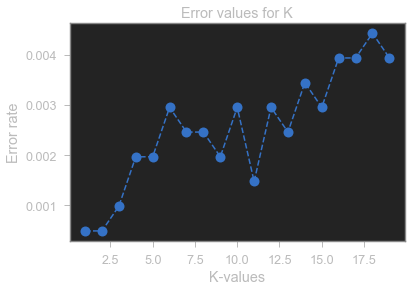

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),error,linestyle='dashed',marker='o',markersize=10)
plt.title("Error values for K")
plt.xlabel("K-values")
plt.ylabel("Error rate")

In [25]:
# therefore to get more accuracy at i=1 to 2

In [26]:
knn=KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(X_train,Y_train)
knn_predt=knn.predict(X_test)
knn_acc=accuracy_score(knn_predt,Y_test)
print("Accuracy score: ",knn_acc)

Accuracy score:  0.999507631708518


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
acc=[]
for i in range(0,20):
    print("i=",i)
    dt=DecisionTreeClassifier(random_state=i)
    dt.fit(X_train,Y_train)
    dt_predt=dt.predict(X_test)
    dt_acc=accuracy_score(dt_predt,Y_test)
    acc.append(dt_acc)
    print("Accuracy score: ",dt_acc)

i= 0
Accuracy score:  1.0
i= 1
Accuracy score:  1.0
i= 2
Accuracy score:  1.0
i= 3
Accuracy score:  1.0
i= 4
Accuracy score:  1.0
i= 5
Accuracy score:  1.0
i= 6
Accuracy score:  1.0
i= 7
Accuracy score:  1.0
i= 8
Accuracy score:  1.0
i= 9
Accuracy score:  1.0
i= 10
Accuracy score:  1.0
i= 11
Accuracy score:  1.0
i= 12
Accuracy score:  1.0
i= 13
Accuracy score:  1.0
i= 14
Accuracy score:  1.0
i= 15
Accuracy score:  1.0
i= 16
Accuracy score:  1.0
i= 17
Accuracy score:  1.0
i= 18
Accuracy score:  1.0
i= 19
Accuracy score:  1.0


In [28]:
print("Max accuracy: ",max(acc))

Max accuracy:  1.0


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,Y_train)
rf_predt=rf.predict(X_test)
rf_acc=accuracy_score(rf_predt,Y_test)
print("Accuracy score: ",rf_acc)
rf_clas=classification_report(Y_test,rf_predt)
print("Classification report:\n",rf_clas)
rf_con=confusion_matrix(Y_test,rf_predt)
print('Confusion matrix:\n',rf_con)

Accuracy score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Confusion matrix:
 [[1061    0]
 [   0  970]]


In [30]:
df1={'Algorithms':['AdaBoost','Logistic Regression','KNN','Decision Tree','Random Forest'],
    'Accuracy':[ab_acc,lr_acc,knn_acc,max(acc),rf_acc]}
df1=pd.DataFrame(df1)
print(df1.sort_values(by='Accuracy',ascending=False).reset_index())

   index           Algorithms  Accuracy
0      0             AdaBoost  1.000000
1      3        Decision Tree  1.000000
2      4        Random Forest  1.000000
3      2                  KNN  0.999508
4      1  Logistic Regression  0.950271


In [31]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int32
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object